1. Escolha uma imagem para segmentação (pode ser uma imagem de objetos com cores distintas
ou uma imagem em tons de cinza com regiões bem definidas).

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
imagem = cv2.imread('../imgs/astroBot.jpg')
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

2. Utilize OpenCV para converter a imagem para escala de cinza.

In [17]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

3. Aplique a técnica de limiarização binária para separar objetos do fundo.

In [18]:
_, limiar_binario = cv2.threshold(imagem_cinza, 127, 255, cv2.THRESH_BINARY)

4. Experimente a técnica de limiarização adaptativa e compare os resultados.

In [19]:
limiar_adaptativo = cv2.adaptiveThreshold(
    imagem_cinza, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 11, 2
)

5. Realize a segmentação baseada em cor, convertendo a imagem para o espaço de cores HSV e
extraindo objetos de uma determinada cor.

In [20]:
imagem_hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

In [21]:
limite_inferior = np.array([100, 150, 50])
limite_superior = np.array([140, 255, 255])
mascara = cv2.inRange(imagem_hsv, limite_inferior, limite_superior)
segmentado_cor = cv2.bitwise_and(imagem, imagem, mask=mascara)
segmentado_cor_rgb = cv2.cvtColor(segmentado_cor, cv2.COLOR_BGR2RGB)

6. Exiba todas as imagens resultantes para análise e comparação.


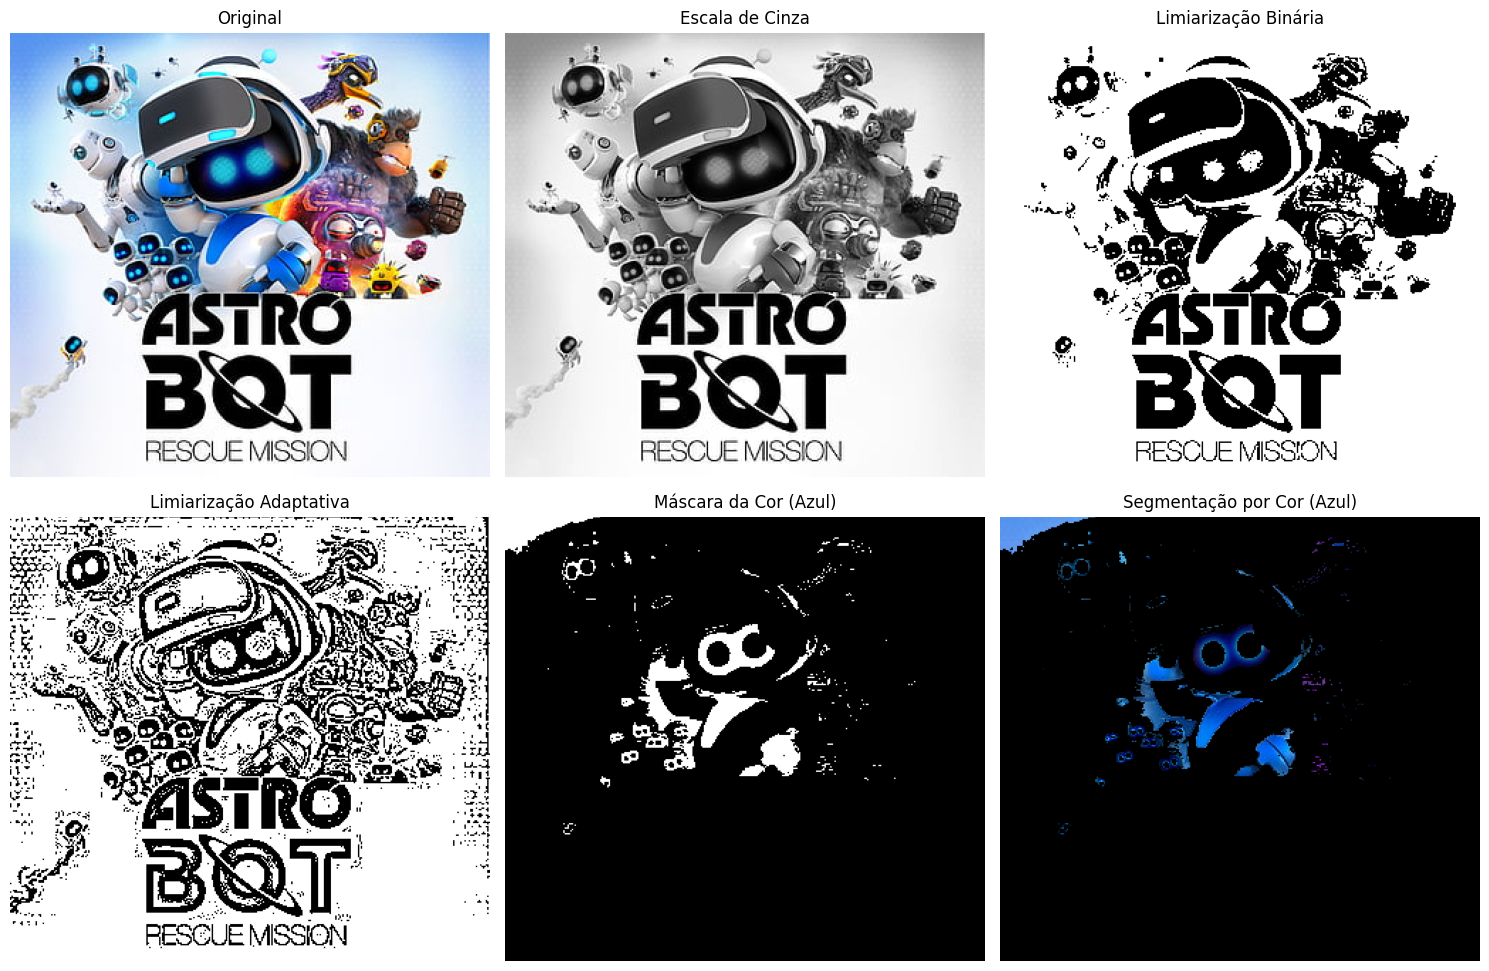

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(imagem_rgb)
axs[0, 0].set_title("Original")
axs[0, 1].imshow(imagem_cinza, cmap='gray')
axs[0, 1].set_title("Escala de Cinza")
axs[0, 2].imshow(limiar_binario, cmap='gray')
axs[0, 2].set_title("Limiarização Binária")
axs[1, 0].imshow(limiar_adaptativo, cmap='gray')
axs[1, 0].set_title("Limiarização Adaptativa")
axs[1, 1].imshow(mascara, cmap='gray')
axs[1, 1].set_title("Máscara da Cor (Azul)")
axs[1, 2].imshow(segmentado_cor_rgb)
axs[1, 2].set_title("Segmentação por Cor (Azul)")

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()